# 4.2.2 Capstone Analytic Report and Research Proposal

By RMM

## Abstract

This report describes a dataset concerning subjects with and without diabetes. We analize factors that cause this metabolic disorder and considering our data we'll determine possible solutions to prevent it.


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, pearsonr
from IPython.display import HTML
%matplotlib inline

## Dataset description

__Original Owner:__ National Institute of Diabetes and Digestive and Kidney Diseases

__Source:__ https://www.kaggle.com/uciml/pima-indians-diabetes-database

__Dataset Information:__ The population for this study was the Pima Indian population near Phoenix, Arizona. That population has been under continuous study since 1965 by the National Institute of Diabetes and Digestive and Kidney Diseases because of its high incidence rate of diabetes. Each community resident over 5 years of age was asked to undergo a standardized examination every two years, which included an oral glucose tolerance test. Diabetes was diagnosed according to World Health Organization Criteria; that is, if the 2 hour post-load plasma glucose was at least 200 mg/dl (11.1 mmol/l) at any survey examination or if the Indian Health Service Hospital serving the community found a glucose concentration of at least 200 mg/dl during the course of routine medical care.

__Case Selection:__ Diabetes was defined as a plasma glucose concentration greater the 200 mg/dl two hours following the ingestion of 75 gm of a carbohydrate solution. Cases were drawn from the pool of examinations which met the following criteria:

1. The subject was female.

2. The subject was >= 21 year of age at the time of the index examination. An index examination refers to the study that was chosen for use in this model. It does not necessarily correspond to the chronologically first examination for this subject.

3. Only one examination was selected per subject. That examination was one that revealed a nondiabetic GTT and met one of the following two criteria:

    a. Diabetes was diagnosed within five years of the examination, OR

    b. A GTT performed five or more years later failed to eveal diabetes mellitus.
    
4. If diabetes occurred within one year of an examination, that examination was excluded from the study to remove from the forecasting model those cases that were potentially easier to forecast. In 75% of the excluded examinations, DM was diagnosed within six months. Using these criteria, 768 examinations were selected.

__Attribute Information:__

1. Number of times pregnant 
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test (mg/dL)
3. Diastolic blood pressure (mm/Hg) 
4. Triceps skin fold thickness (mm) 
5. 2-Hour serum insulin (mu U/ml) 
6. Body mass index (weight in kg/(height in m)^2) 
7. Diabetes pedigree function 
8. Age (years) 
9. Class variable (0 or 1) 

In [10]:
data = pd.read_csv('diabetes.csv')

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


__Values Description:__ 

* All the data in the set is numerical.
* Every attribute count is 768, meaning that there are no null values.
* Means osccilate between 0.3 and 121, with a broad difference in standard deviations, oscillating from 0.3 to 115.
* Almost all atributes have minimum values of zero. This my indicate that some attributes have a null value replaced by a zero.

In [12]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


__Subject's background data:__

In [13]:
is_positive = data.Outcome == 1
is_negative = data.Outcome == 0

In [22]:
print('The following describes statistics regarding subjects with diabetes:')
data[is_positive].describe()

The following describes statistics regarding subjects with diabetes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.0
mean,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164,1.0
std,3.741239,31.939622,21.491812,17.679711,138.689125,7.262967,0.372354,10.968254,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,1.0
25%,1.750000,119.000000,66.000000,0.000000,0.000000,30.800000,0.262500,28.000000,1.0
50%,4.000000,140.000000,74.000000,27.000000,0.000000,34.250000,0.449000,36.000000,1.0
75%,8.000000,167.000000,82.000000,36.000000,167.250000,38.775000,0.728000,44.000000,1.0
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,70.000000,1.0


In [23]:
print('The following describes statistics regarding subjects without diabetes:')
data[is_negative].describe()

The following describes statistics regarding subjects without diabetes:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,500.000000,500.0000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0
mean,3.298000,109.9800,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000,0.0
std,3.017185,26.1412,18.063075,14.889947,98.865289,7.689855,0.299085,11.667655,0.0
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.0
25%,1.000000,93.0000,62.000000,0.000000,0.000000,25.400000,0.229750,23.000000,0.0
50%,2.000000,107.0000,70.000000,21.000000,39.000000,30.050000,0.336000,27.000000,0.0
75%,5.000000,125.0000,78.000000,31.000000,105.000000,35.300000,0.561750,37.000000,0.0
max,13.000000,197.0000,122.000000,60.000000,744.000000,57.300000,2.329000,81.000000,0.0


Evaluating the description based on subjects with diabetes and subjects without diabetes, we can drive several conclusions:

* The total number of subjects with diabetes is 268, and without diabetes 500.
* The mean pregancies in both situations is slightly different. Those subjects with diabetes have an average of 2 more children than those who don't have diabetes.
* The glucose parameter shows that those persons with diabetes have an average of 141 mg/dL in contrast with those who don't have, that have 110 mg/dL.
* Blood pressure, skin thikness, BMI and the diabetes pedefgree function, show similar values in both situations.
* Insuline does show a difference of 32 Uh/ml, with a higher insulin value concerning in the the group with diabetes.
* The mean age of those subjects with diabetes is 37, and 31 is the mean age for those subjects without diabetes.

__Background data's visualiztion:__

The number of subjects with diabetes are 268.
The number of subjects without diabetes are 500.


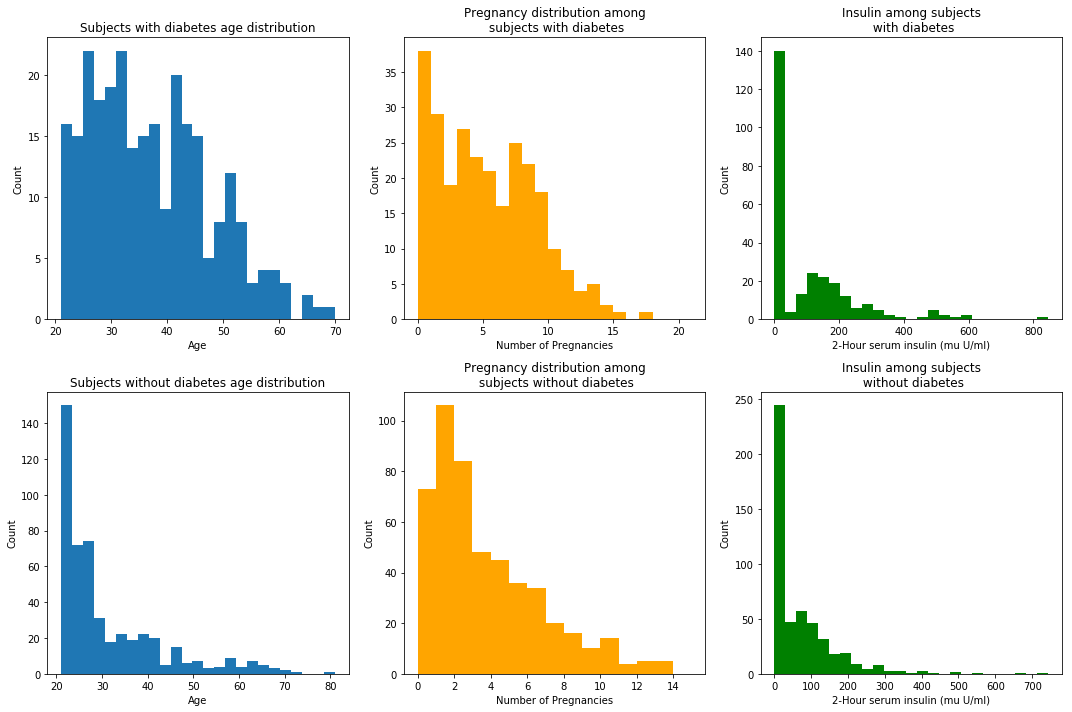

In [20]:
print('The number of subjects with diabetes are {}.'.format(len(data.loc[data.Outcome==1])))
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(data.loc[data.Outcome==1,'Age'], bins=25)
plt.title("Subjects with diabetes age distribution")
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 3, 2)
plt.hist(data.loc[data.Outcome==1, 'Pregnancies'], bins=range(22), color='orange')
plt.title('Pregnancy distribution among\n subjects with diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

plt.subplot(2, 3, 3)
plt.hist(data.loc[data.Outcome==1, 'Insulin'], bins=25, color='green')
plt.title('Insulin among subjects\n with diabetes')
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Count')

print('The number of subjects without diabetes are {}.'.format(len(data.loc[data.Outcome==0])))

plt.subplot(2, 3, 4)
plt.hist(data.loc[data.Outcome==0,'Age'], bins=25)
plt.title("Subjects without diabetes age distribution")
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(2, 3, 5)
plt.hist(data.loc[data.Outcome==0, 'Pregnancies'], bins=range(16), color='orange')
plt.title('Pregnancy distribution among\n subjects without diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')

plt.subplot(2, 3, 6)
plt.hist(data.loc[data.Outcome==0, 'Insulin'], bins=25, color='green')
plt.title('Insulin among subjects\n without diabetes')
plt.xlabel('2-Hour serum insulin (mu U/ml)')
plt.ylabel('Count')

plt.tight_layout()

## Ask and answer analytic questions

__Question 1:__ Considering isolatedly the value of number of pregnancies, does this relate directly in having diabetes?

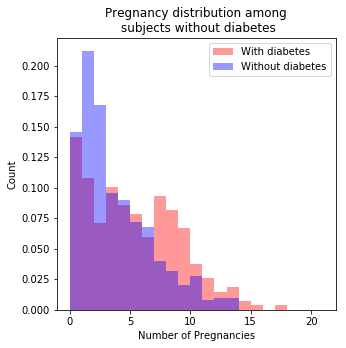

Number of pregnancies T-test: Ttest_indResult(statistic=5.9069614794974905, pvalue=6.8219256004571448e-09)


In [62]:
plt.figure(figsize=(5, 5))

plt.hist(data.loc[data.Outcome==1, 'Pregnancies'], bins=range(22), color='red', alpha=0.4, normed=True, label='With diabetes')
plt.hist(data.loc[data.Outcome==0, 'Pregnancies'], bins=range(22), color='blue', alpha=0.4, normed=True, label='Without diabetes')
plt.title('Pregnancy distribution among\n subjects without diabetes')
plt.xlabel('Number of Pregnancies')
plt.ylabel('Count')
plt.legend()

plt.show()

print('Number of pregnancies T-test:', ttest_ind(data.loc[data.Outcome==1, 'Pregnancies'], data.loc[data.Outcome==0, 'Pregnancies'], equal_var=False))

__Answer to question 1:__ In the graph above we can note that there among the population with diabetes, there are greater number of women having a high number of pregnancies. Calculating the p-value between both of these populations, we see that it is significanttly small (6.8219256004571448e-09), which confirms our latter affirmation. Hence, we can say that the prescence of the metabolic disorder is directly among women is directly related to high number of pregnancies per subject.

__Question 2:__ What factors causing diabetes?

Number of blood pressure T-test: Ttest_indResult(statistic=1.7130865949770784, pvalue=0.087354248214615779)
Number of skin thickness T-test: Ttest_indResult(statistic=1.9705792220450487, pvalue=0.049355860086480192)
Number of BMI T-test: Ttest_indResult(statistic=8.6193168813579462, pvalue=6.5662376247083305e-17)


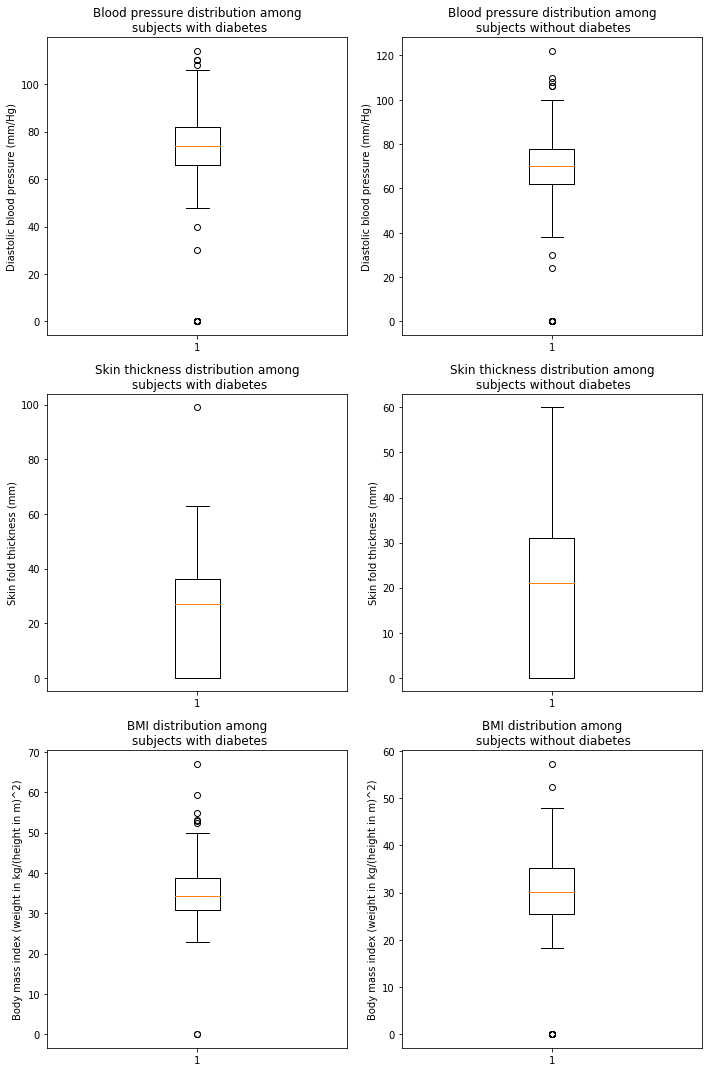

In [101]:
plt.figure(figsize=(10, 15))

plt.subplot(3, 2, 1)
plt.boxplot(data.loc[data.Outcome==1, 'BloodPressure'])
plt.title('Blood pressure distribution among\n subjects with diabetes')
plt.ylabel('Diastolic blood pressure (mm/Hg)')

plt.subplot(3, 2, 2)
plt.boxplot(data.loc[data.Outcome==0, 'BloodPressure'])
plt.title('Blood pressure distribution among\n subjects without diabetes')
plt.ylabel('Diastolic blood pressure (mm/Hg)')

plt.subplot(3, 2, 3)
plt.boxplot(data.loc[data.Outcome==1, 'SkinThickness'])
plt.title('Skin thickness distribution among\n subjects with diabetes')
plt.ylabel('Skin fold thickness (mm)')

plt.subplot(3, 2, 4)
plt.boxplot(data.loc[data.Outcome==0, 'SkinThickness'])
plt.title('Skin thickness distribution among\n subjects without diabetes')
plt.ylabel('Skin fold thickness (mm)')

#--------------------------------------------------------------

plt.subplot(3, 2, 5)
plt.boxplot(data.loc[data.Outcome==1, 'BMI'])
plt.title('BMI distribution among\n subjects with diabetes')
plt.ylabel('Body mass index (weight in kg/(height in m)^2)')

plt.subplot(3, 2, 6)
plt.boxplot(data.loc[data.Outcome==0, 'BMI'])
plt.title('BMI distribution among\n subjects without diabetes')
plt.ylabel('Body mass index (weight in kg/(height in m)^2)')


plt.tight_layout()
print('Number of blood pressure T-test:', ttest_ind(data.loc[data.Outcome==1, 'BloodPressure'], data.loc[data.Outcome==0, 'BloodPressure'], equal_var=False))
print('Number of skin thickness T-test:', ttest_ind(data.loc[data.Outcome==1, 'SkinThickness'], data.loc[data.Outcome==0, 'SkinThickness'], equal_var=False))
print('Number of BMI T-test:', ttest_ind(data.loc[data.Outcome==1, 'BMI'], data.loc[data.Outcome==0, 'BMI'], equal_var=False))

__Answer to question 2:__ We compared three different attributes among the populaitons that have and do not have diabetes. From the box plots you cannot observe great differences, and it's difficult to clearly establish which attributes contribute to having diabetes or not. However, when we run T-tests for the latter attributes, we see that the BMI's p-value (6.5662376247083305e-17) is extremely low, giving us a hint that there is a significance difference in this aspect. Therefore, we can say that the body's mass index contributes significantly in having or not diabetes.